<a href="https://colab.research.google.com/github/KristynaPijackova/Seminar_RNN/blob/main/Classification_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of ECG signals

The aim of this notebook is to introduce you how you can use recurrent layers and 1d convolutional layer for classification tasks with signals. It will also show you how you can prepare a dataset for training. 

---



We are going to use ECG5000 dataset, which has 5000 samples of ECG signals with 5 classes: 

1 - Normal

2 - R-on-T Premature Ventricular Contraction

3 - Premature Ventricular Contraction 

4 - Supraventricular Premature beat

5 - Unclassified Beat




## Download data

For this we use data from following page: 

http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

Options you have to download the data:


1.   Go to the website, download it localy or if you have  and upload back into your Colab workspace. However, uploading data in here isn't the quickest and you lose the data and have to re-do the process everytime you switch workspace (**not recommended**).

2.   Use command !wget along with the link which lets you download the data. Command !unzip along with the name with the zip file then unzips the content of the file.
```
! wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
! unzip ECG5000.zip
```

3. Another option is to store your data in gdrive and use another command to download the data into Colab.
```
!gdown --id 1jo255jnoJniagZZd3IKbixb1i0kUIQCr
!unzip /content/data.zip
```
To get the file id go the the sharable link for your data and copy the higlihted part (between d/ and /view?...)

    https:// drive.google.com/file/d/__1jo255jnoJniagZZd3IKbixb1i0kUIQCr__/view?usp=sharing

Mind that you lose the data with the later two options as well after you switch workspace, but the process of uploading the data back this way is much faster.


### Download the ECG dataset 

Here we use the direct link to the website along with !wget and unzip the file - if you don't know the name of the file you can see the name of the downloaded file in the left panel if you click on the folder icon 📁

In [1]:
! wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip

--2021-12-21 14:23:37--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  43.3MB/s    in 0.2s    

2021-12-21 14:23:38 (43.3 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



Or you can use another unix command !ls /content/ (this is how the folder where you work with in here is named). 

This shows you the file stored in here. 

In [2]:
!ls /content/

ECG5000.zip  sample_data


Now we know how our file is named we can unzip it

In [3]:
! unzip ECG5000.zip

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


We see there are quite few files - we are going to use the text files `ECG5000_TEST.txt` and `ECG5000_TRAIN.txt`

And we can once again use another unix command !head to get a peak at how are data looks like.

In [4]:
! head /content/ECG5000_TRAIN.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

## Import libraries

Now that we have a basic idea what we are going to work with, we can import libraries we are about to use.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

## Let's prepare our data

We start by creating a dataframe - basicly we just get content of the textfiles into pandas dataframe so it is easier for us to work with it.

In [6]:
df_train = pd.read_csv('/content/ECG5000_TEST.txt', sep='  ', header=None)
df_test = pd.read_csv('/content/ECG5000_TRAIN.txt', sep='  ', header=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [7]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,3.690844,0.711414,-2.114092,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,0.878836,0.831067,0.832466,0.790993,0.733184,0.675314,0.760751,0.645451,0.644724,0.593140,0.600701,0.496795,0.409546,0.330819,0.159581,0.200914,0.107753,-0.039165,-0.096833,-0.170630,-0.296952,-0.381269,-0.363097,-0.501362,-0.673076,-0.551881,-0.650941,-0.542608,-0.661102,...,0.815496,0.912150,1.197038,1.525856,1.677409,1.493802,1.332885,1.033417,0.709380,0.504176,0.121977,-0.144692,-0.706222,-0.971959,-1.092812,-1.204838,-1.114166,-1.087325,-1.285353,-1.248159,-1.210142,-1.278470,-1.278924,-1.376985,-1.232817,-1.189943,-1.344416,-1.239010,-1.174265,-0.699666,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1.0,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,-0.493585,-0.424566,-0.443613,-0.347533,-0.429206,-0.419432,-0.420668,-0.498734,-0.410890,-0.443809,-0.463833,-0.499894,-0.524206,-0.616694,-0.606410,-0.565365,-0.661417,-0.603203,-0.695499,-0.717034,-0.696853,-0.734096,-0.792403,-0.820478,-0.727217,-0.828315,-0.708753,-0.696388,-0.662056,...,1.066590,1.167701,1.305410,1.500784,1.739557,1.977449,1.916066,1.899681,1.702459,1.579359,1.268397,1.021553,0.568299,0.150091,-0.044534,-0.090432,-0.144367,-0.131316,-0.110823,-0.088810,-0.095817,-0.082048,-0.053043,-0.189978,-0.111385,-0.128527,-0.047618,-0.016406,0.108356,0.293390,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1.0,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,-0.842542,-0.829726,-0.790482,-0.785441,-0.835461,-0.796361,-0.771146,-0.815385,-0.735402,-0.798965,-0.679510,-0.683254,-0.739599,-0.815913,-0.902384,-0.813008,-0.855560,-0.793842,-0.853332,-0.843024,-0.844967,-0.917276,-0.979700,-1.031643,-0.958200,-1.008464,-1.043407,-1.009558,-1.001219,...,0.443230,0.663832,0.939063,1.196396,1.238014,1.310015,1.594162,1.836205,1.873225,1.960083,1.803756,1.718426,1.592971,1.344949,1.166471,0.695750,0.279590,0.180811,0.201507,0.191033,0.153371,0.178460,0.263660,0.271427,0.271596,0.356748,0.257862,0.277773,0.331739,0.384731,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1.0,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,-0.589493,-0.455109,-0.201613,0.055583,-0.095133,0.023464,-0.291556,-0.405063,-0.269354,-0.197477,-0.032429,-0.501257,-0.399656,-0.283003,-0.202945,-0.570158,-0.777244,-0.419418,-0.375513,-0.638091,-0.969082,-0.780202,-0.617075,-0.898172,-0.970493,-0.774366,-0.650623,-0.680303,-1.015144,...,1.602372,1.800425,2.146134,1.995252,1.892413,2.119649,1.480067,1.071041,1.186209,0.863298,0.301564,-0.126937,-0.301484,-0.436105,-0.284822,-0.224644,-0.308797,-0.301286,-0.131489,-0.388988,-0.400571,-0.340024,-0.413135,-0.391857,-0.360207,-0.280891,-0.314775,0.061143,0.294456,0.324627,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1.0,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,-0.386373,-0.469063,-0.471558,-0.437022,-0.431340,-0.311658,-0.341819,-0.397136,-0.476920,-0.459986,-0.390030,-0.519005,-0.773094,-0.672552,-0.488372,-0.606983,-0.806713,-0.904297,-0.756202,-0.720340,-0.967101,-0.865493,-0.888156,-1.003868,-0.966961,-1.058695,-1.150677,-1.154902,-0.868811,...,1.372542,1.683346,1.834551,1.902015,1.861268,1.680313,1.607964,1.364396,1.180712,0.933070,0.622765,0.419651,0.196120,0.136137,0.187574,0.235852,0.154591,0.154583,0.210870,0.316320,0.332887,0.334439,0.273814,0.216870,0.255356,0.275036,0.361964,0.406368,0.920

See? It's basicaly the same thing as wee saw just few moments ago 😉

However, since pandas df doesn't like just numerical columns, we add a prefix to it, so we can work with them.

In [8]:
df_train = df_train.add_prefix('c')
df_test = df_test.add_prefix('c')
df_test.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

## Analyze the dataset

In machine and deep learning it is important to know what data you are working with. Not just what is the data meant to be, but what is the structure, what values can I expect, what is the classes distribution, how does the data even look like, etc...

So the following part is supposed to get us eve more familiar with the data we are working with.

Here we can see basic info about the data - we have 141 columns c0 to c140. 
The data is stored as float64 and the memory usage is 4.8 MB. 

In [9]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 141 entries, c0 to c140
dtypes: float64(141)
memory usage: 4.8 MB


Next we can use `.describe()` which gets us a bit of a statistical view on the data. 

What we can see is that the max.min value are +/-7, the mean value is more or less in range between (-1,1) so we might be okay without normalization. 

In [10]:
df_train.describe() 

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,1.527778,-0.273962,-1.660351,-2.497708,-3.121793,-3.166346,-2.862646,-2.271681,-1.797901,-1.407947,-0.934711,-0.585628,-0.434045,-0.337988,-0.258481,-0.184982,-0.121027,-0.071500,-0.042928,-0.038844,-0.042692,-0.050602,-0.062233,-0.072729,-0.087381,-0.103486,-0.118381,-0.136664,-0.158051,-0.180108,-0.203567,-0.226785,-0.248739,-0.273314,-0.292404,-0.305779,-0.316080,-0.316963,-0.313462,-0.304287,...,0.947228,1.052929,1.140186,1.189278,1.204343,1.193629,1.157774,1.089035,0.988832,0.865974,0.721445,0.569751,0.427732,0.318375,0.240838,0.179119,0.132642,0.108074,0.091474,0.079809,0.065038,0.046405,0.024178,0.003514,-0.010001,-0.019177,-0.026246,-0.029239,-0.000080,0.085341,0.146259,0.073410,-0.060409,-0.273551,-0.502636,-0.753850,-0.824197,-0.630282,-0.474437,-0.694958
std,0.761301,1.153257,1.448446,1.384922,1.300375,1.101844,0.906330,0.735420,0.628203,0.642411,0.660208,0.592378,0.494081,0.426750,0.394789,0.384017,0.387249,0.401786,0.416191,0.424459,0.430667,0.436936,0.443310,0.449166,0.456154,0.463019,0.473821,0.484526,0.492577,0.504355,0.516666,0.530513,0.543503,0.552457,0.560785,0.563777,0.565087,0.558887,0.546928,0.534422,...,0.517638,0.572328,0.612933,0.620934,0.606668,0.582097,0.554094,0.531218,0.506708,0.484677,0.482879,0.510357,0.544097,0.563080,0.568491,0.569741,0.581223,0.586771,0.590115,0.596039,0.602675,0.608703,0.618635,0.631698,0.647564,0.665918,0.679359,0.694586,0.754245,0.924010,1.175640,1.410561,1.652410,1.899489,2.063698,2.087378,2.050563,1.848085,1.817460,1.411511
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.259295,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.533600,-2.644038,-2.450031,-2.473158,-2.743753,...,-2.628040,-2.242705,-1.853174,-1.582690,-1.898351,-2.155814,-2.431403,-2.681604,-2.864706,-3.415656,-3.497624,-3.091282,-2.608510,-2.383204,-2.052557,-2.570546,-3.059078,-3.311559,-3.501555,-4.007212,-4.199563,-3.335678,-3.127603,-3.042532,-3.116177,-3.972320,-4.754057,-4.288919,-3.802469,-4.014642,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-4.911417,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.018202,-2.710514,-3.675967,-4.221921,-4.006748,-3.472986,-2.779941,-2.164166,-1.773173,-1.360472,-0.929389,-0.702857,-0.558051,-0.455224,-0.392508,-0.348699,-0.331491,-0.333724,-0.345982,-0.360311,-0.375028,-0.394337,-0.416998,-0.442244,-0.473245,-0.503750,-0.541208,-0.571953,-0.618612,-0.651927,-0.697186,-0.737693,-0.771678,-0.800814,-0.813

We could also have a peak at how the classes are distributed in the dataset. 

This dataset stores the info about the classes in the first column, thus we index the df and use `.value_counts()` to see byt how many samples is each class represented.



In [11]:
df_train['c0'].value_counts()

1.0    2627
2.0    1590
4.0     175
3.0      86
5.0      22
Name: c0, dtype: int64

In [12]:
df_test['c0'].value_counts()

1.0    292
2.0    177
4.0     19
3.0     10
5.0      2
Name: c0, dtype: int64

And we can even visualize it... 

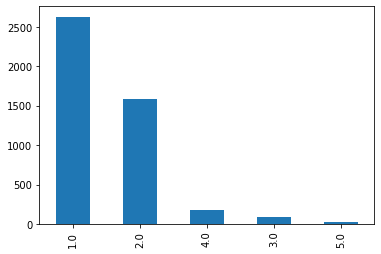

In [13]:
df_train['c0'].value_counts().plot(kind='bar')

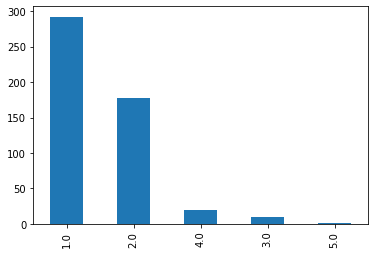

In [14]:
df_test['c0'].value_counts().plot(kind='bar')

## Split the dataframe into data-points and labels

The first column of our dataframe 'c0' holds the labels from 1 to 5 which represent the classes we want to classify. 

At this point we will separate the data from the labels and create `x_train, x_test, y_train, y_test` arrays.

In [15]:
x_train = df_train.values[:,1:]  # [all rows, column 1 to end]
y_train = df_train.values[:,0]   # [all rows, column 0]

x_test = df_test.values[:,1:]    # [all rows, column 1 to end]
y_test = df_test.values[:,0]     # [all rows, column 0]

## Handling imbalanced datasets

As we can see, out dataset quite imbalanced - **which is not good!**


---


So what can we actually do about it? 

*   Undersampling
*   Oversampling
*   Combine under- and oversampling
*   Generate new data - not ideal, not always possible
*   Generate new data with generative networks

---

Few blog posts about over- and undersampling

*   [5 Techniques to Handle Imbalanced Data For a Classification Problem](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)


* [Stop using SMOTE to handle all your Imbalanced Data](https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be)
 

---

Library which helps us deal with imbalanced dataset

[imbalanced-learn](https://imbalanced-learn.org/stable/auto_examples/index.html)




Here is a simple function which will apply under/oversampling method to our data. It returns arrays of new samples and their labels.

In [16]:
from imblearn.combine import SMOTETomek
def over_under_sampling(dataframe):
    """
    Use SMOTETomek technique to oversample our dataset. 
    
    This function is written to be applied to our datasets, 
    where the first column holds the labels, and the rest is the 
    time sequence. 

    It passes the under-represented data - classes 2-5 along
    with the dominant class 1 into the SMOTETomek over- & undersampler
    to balance the dataset. 
    """
    # lists to store the created values in
    x_res = []
    y_res = []

    for i in range(2,6):

        # create copy of the dataframe
        df_copy = dataframe.copy()
        # choose samples of i-th class
        df = df_copy[df_copy['c0'] == i]
        # add samples from 1st class
        df = df.append(df_copy[df_copy['c0'] == 1])
        # split the dataframe into x - data and y - labels
        x = df.values[:,1:]
        y = df.values[:,0]

        # define the imbalance function
        smtomek = SMOTETomek(random_state=42)
        # fit it on our data
        x_r, y_r = smtomek.fit_resample(x, y)
        
        # we want to skip the data we fit it on - only want the new data
        skip = y.shape[0]
        # append the data into our above lists
        x_res.append(x_r[skip:,:])
        y_res.append(y_r[skip:])

    # return the data as concatenated arrays -> only one array of all samples
    # instead of a list of arrays
    return np.concatenate(x_res), np.concatenate(y_res)

Here we call the above function

In [17]:
x_os,y_os = over_under_sampling(df_train)

And now we combine it with our original data.

In [18]:
x_train_oversample = np.concatenate((x_train, x_os))
y_train_oversample = np.concatenate((y_train, y_os))

Let's see how the before imbalanced data looks now...

<BarContainer object of 5 artists>

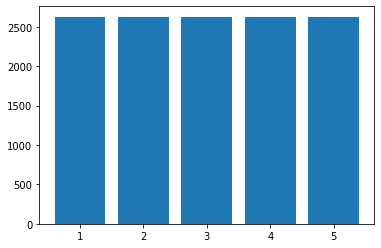

In [19]:
lbl, count = np.unique(y_train_oversample, return_counts=True)

plt.bar(lbl, count)

That's better, isn't it? But we could maybe check how the new synthetic data looks like and if it is somewhat similar to the original data?

## Let's visualize the signals

Let's write a for loop where we get few indexes of our target class with the help of `np.where()` and then plot two subplots one with original data and one with the synthetical for comparisson.

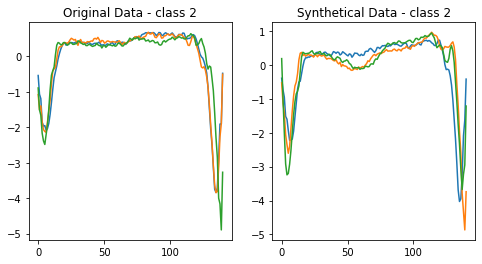

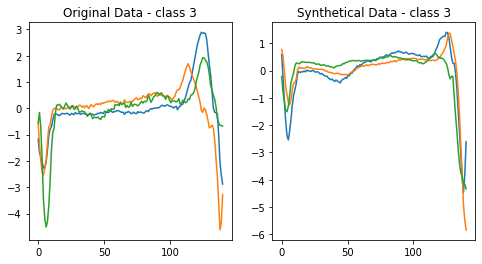

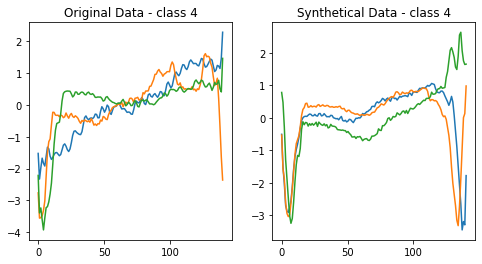

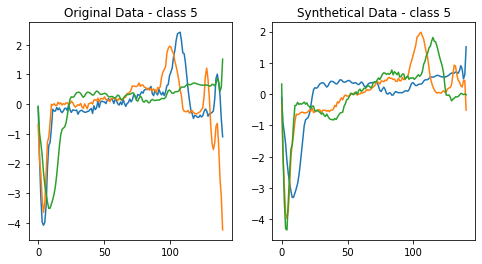

In [20]:
t = np.linspace(0,140, 140)

for i in range(2,6):
    id = np.where(y_train == i)[0][:3]
    id_os = np.where(y_os == i)[0][:3]


    plt.figure(figsize=(8,4))
    plt.subplot(1,2 , 1) 
    plt.plot(t, x_train[id[0]], t, x_train[id[1]], t, x_train[id[2]], )
    plt.title('Original Data - class ' + str(i))
    
    plt.subplot(1, 2, 2) 
    plt.plot(t, x_os[id_os[0]], t, x_os[id_os[1]], t, x_os[id_os[2]], )
    plt.title('Synthetical Data - class ' + str(i))


## And now we can get to training

Just few last things we need to do, so that our models can train on the data



We normalize the data with the help of MinMaxScaler that was imported from sklearn.

Here the scaler holds the MinMaxScaler and we fit it on our training data in the second row of the code, which will be applied on the data we want to scale just in a second with `data_scaler.transform(data_we_want_to_scale)`

In [21]:
scaler = preprocessing.MinMaxScaler()
data_scaler = scaler.fit(x_train)

In [22]:
x_train = data_scaler.transform(x_train)
x_train_oversample = data_scaler.transform(x_train_oversample)
x_test = data_scaler.transform(x_test)

In [23]:
x_train_oversample = np.expand_dims(x_train_oversample, axis=-1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [24]:
# we need to index classes from 0 to 4
y_train = y_train - 1            
y_test = y_test - 1       
y_train_oversample = y_train_oversample - 1

In [25]:
x_train_o, x_val, y_train_o, y_val = train_test_split(x_train_oversample,
                                                      y_train_oversample,
                                                      test_size=0.2,
                                                      random_state=42) 

## Define functions to plot loss, accuracy and confusion matrix

In [26]:
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    return plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    return plt.show()

def cm_plot(model, x_test):
    y_predict = model.predict(x_test)
    y_pred = []

    for i in range(len(y_predict)):
        y_pred.append(np.argmax(y_predict[i,:]))

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()

## Model with Conv1D

Comment to the input shape: 

We have data with 140 timesteps and only one feature (array 140x1). However, if you happen to have data which have more features - I/Q representation with (tx2) shape where t are the timesteps you can simply change the 1 to match the number of your feature representations. 

In [28]:
layer_in = layers.Input(shape=(140,1))
layer = layers.Conv1D(filters=32, kernel_size=4, activation='relu')(layer_in)
layer = layers.MaxPool1D(pool_size=2)(layer)
layer = layers.Conv1D(filters=32, kernel_size=4, activation='relu')(layer)
layer = layers.MaxPool1D(pool_size=2)(layer)
layer = layers.Flatten()(layer)
layer = layers.Dense(32, activation='relu')(layer)
layer = layers.Dropout(0.2)(layer)
layer_out = layers.Dense(5, activation='softmax')(layer)

model = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
             keras.callbacks.ModelCheckpoint('model.h5', 
                                             save_best_only=True, 
                                             monitor='val_loss'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                               factor=0.1, 
                                               patience=3,
                                               ),
             keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=8,
                                           verbose=1)
             ]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])


In `.summary()` you can see the output shape has None at the beginning - this is for the batchsize which can vary - you set the value in the `.fit()` function

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 137, 16)           80        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 68, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 16)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0     

In [29]:
history = model.fit(x_train_o, y_train_o,
                    batch_size=128, epochs=50, verbose=2,
                    validation_data=(x_val, y_val),
                    shuffle=True, callbacks=callbacks)

Epoch 1/50
83/83 - 14s - loss: 1.5090 - accuracy: 0.3774 - val_loss: 1.1741 - val_accuracy: 0.6353 - lr: 0.0010 - 14s/epoch - 168ms/step
Epoch 2/50
83/83 - 1s - loss: 0.9996 - accuracy: 0.6184 - val_loss: 0.8081 - val_accuracy: 0.7240 - lr: 0.0010 - 934ms/epoch - 11ms/step
Epoch 3/50
83/83 - 1s - loss: 0.8307 - accuracy: 0.6873 - val_loss: 0.7138 - val_accuracy: 0.7472 - lr: 0.0010 - 943ms/epoch - 11ms/step
Epoch 4/50
83/83 - 1s - loss: 0.7545 - accuracy: 0.7161 - val_loss: 0.6608 - val_accuracy: 0.7628 - lr: 0.0010 - 866ms/epoch - 10ms/step
Epoch 5/50
83/83 - 1s - loss: 0.7098 - accuracy: 0.7332 - val_loss: 0.6099 - val_accuracy: 0.7701 - lr: 0.0010 - 813ms/epoch - 10ms/step
Epoch 6/50
83/83 - 1s - loss: 0.6731 - accuracy: 0.7425 - val_loss: 0.5746 - val_accuracy: 0.7754 - lr: 0.0010 - 903ms/epoch - 11ms/step
Epoch 7/50
83/83 - 1s - loss: 0.6322 - accuracy: 0.7519 - val_loss: 0.5406 - val_accuracy: 0.7864 - lr: 0.0010 - 839ms/epoch - 10ms/step
Epoch 8/50
83/83 - 1s - loss: 0.5970 - ac

16/16 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.9360
Test accuracy 0.9359999895095825
Test loss 0.2719200849533081


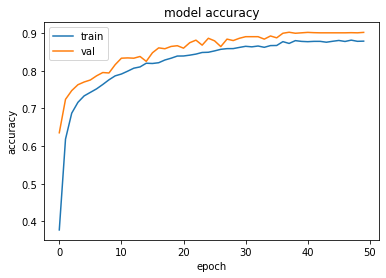

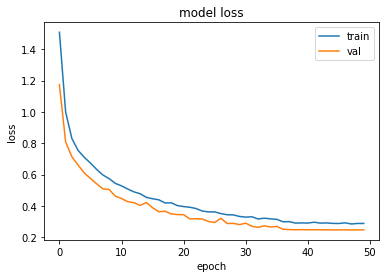

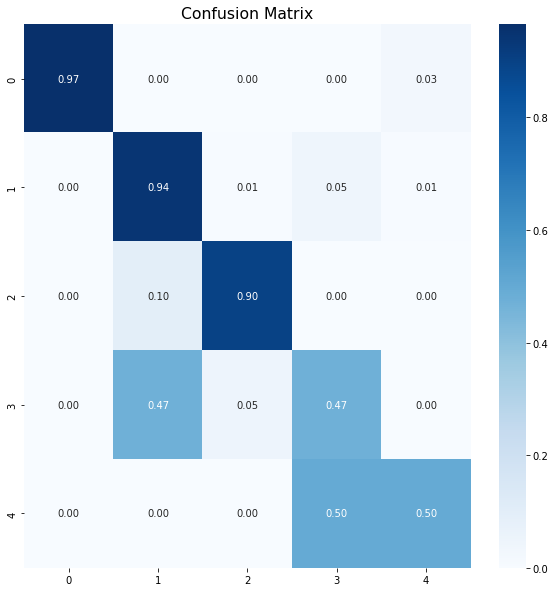

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

plot_acc(history)
plot_loss(history)
cm_plot(model, x_test)

## LSTM

Comment to the input shape: 

We have data with 140 timesteps and only one feature (array 140x1). However, if you happen to have data which have more features - I/Q representation with (tx2) shape where t are the timesteps you can simply change the 1 to match the number of your feature representations. 

However unlike when using conv1d only, you could set the timesteps value to None. This allows you to train and test your data on a variable sequence length. 

The only thing you have to do when training the model is to have batches of the same size. 

In [32]:
layer_in = layers.Input(shape=(140,1)) 
layer = layers.LSTM(16, return_sequences=True)(layer_in)
layer = layers.Dropout(0.4)(layer)
layer = layers.GRU(16, return_sequences=False)(layer)
layer = layers.Dropout(0.4)(layer)
layer = layers.Dense(32, activation='relu')(layer)
layer = layers.Dropout(0.2)(layer)
layer_out = layers.Dense(5, activation='softmax')(layer)

model1 = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
             keras.callbacks.ModelCheckpoint('model.h5', 
                                             save_best_only=True, 
                                             monitor='val_loss'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                               factor=0.1, 
                                               patience=3,
                                               ),
             keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=8,
                                           verbose=1)
             ]

model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])


In [33]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 140, 1)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 140, 16)           1152      
                                                                 
 dropout_4 (Dropout)         (None, 140, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 16)                1632      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0   

In [34]:
history1 = model1.fit(x_train_o, y_train_o,
                    batch_size=128, epochs=50, verbose=2,
                    validation_data=(x_val, y_val),
                    shuffle=True, callbacks=callbacks)

Epoch 1/50
83/83 - 13s - loss: 1.5955 - accuracy: 0.2453 - val_loss: 1.5379 - val_accuracy: 0.4134 - lr: 0.0010 - 13s/epoch - 159ms/step
Epoch 2/50
83/83 - 4s - loss: 1.3271 - accuracy: 0.4218 - val_loss: 1.1653 - val_accuracy: 0.5752 - lr: 0.0010 - 4s/epoch - 52ms/step
Epoch 3/50
83/83 - 4s - loss: 1.1577 - accuracy: 0.5131 - val_loss: 1.0209 - val_accuracy: 0.5752 - lr: 0.0010 - 4s/epoch - 52ms/step
Epoch 4/50
83/83 - 4s - loss: 1.0657 - accuracy: 0.5762 - val_loss: 0.9337 - val_accuracy: 0.6281 - lr: 0.0010 - 4s/epoch - 51ms/step
Epoch 5/50
83/83 - 4s - loss: 1.0109 - accuracy: 0.6083 - val_loss: 0.8710 - val_accuracy: 0.6802 - lr: 0.0010 - 4s/epoch - 52ms/step
Epoch 6/50
83/83 - 4s - loss: 0.9544 - accuracy: 0.6425 - val_loss: 0.8098 - val_accuracy: 0.7073 - lr: 0.0010 - 4s/epoch - 52ms/step
Epoch 7/50
83/83 - 4s - loss: 0.8959 - accuracy: 0.6676 - val_loss: 0.8084 - val_accuracy: 0.6978 - lr: 0.0010 - 4s/epoch - 52ms/step
Epoch 8/50
83/83 - 4s - loss: 0.9117 - accuracy: 0.6608 - v

16/16 [==============================] - 0s 21ms/step - loss: 0.4247 - accuracy: 0.9020
Test accuracy 0.9020000100135803
Test loss 0.42470425367355347


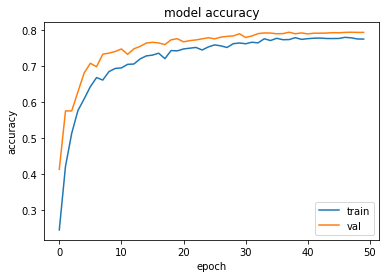

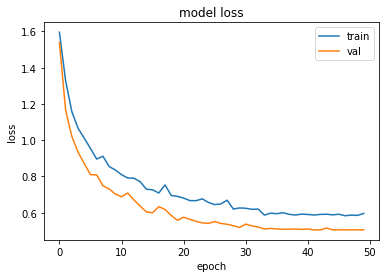

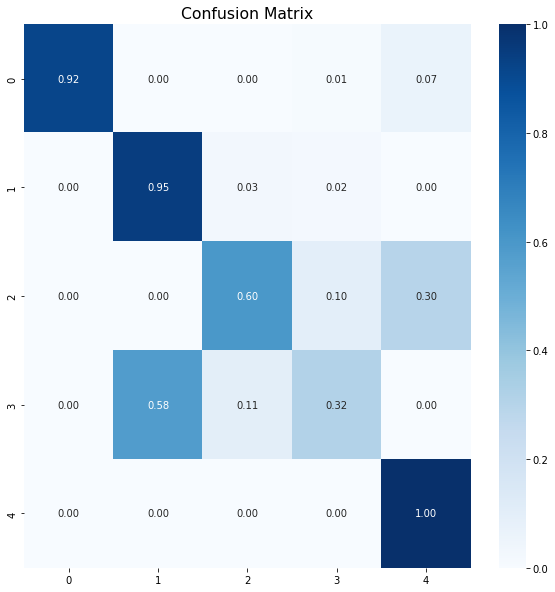

In [35]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

plot_acc(history1)
plot_loss(history1)
cm_plot(model1, x_test)

## GRU

In [63]:
layer_in = layers.Input(shape=(140,1))
layer = layers.Bidirectional(layers.GRU(16, return_sequences=True,))(layer_in)
layer = layers.Dropout(0.4)(layer)
layer = layers.Bidirectional(layers.GRU(32, return_sequences=False,))(layer)
layer = layers.Dropout(0.4)(layer)
layer = layers.Dense(32, activation='relu')(layer)
layer = layers.Dropout(0.2)(layer)
layer_out = layers.Dense(5, activation='softmax')(layer)

model2 = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
             keras.callbacks.ModelCheckpoint('model.h5', 
                                             save_best_only=True, 
                                             monitor='val_loss'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                               factor=0.1, 
                                               patience=3,
                                               ),
             keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=8,
                                           verbose=1)
             ]

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])


In [64]:
model2.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 140, 1)]          0         
                                                                 
 bidirectional_16 (Bidirecti  (None, 140, 32)          1824      
 onal)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 140, 32)           0         
                                                                 
 bidirectional_17 (Bidirecti  (None, 64)               12672     
 onal)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                208

In [65]:
history2 = model2.fit(x_train_o, y_train_o,
                    batch_size=128, epochs=50, verbose=2,
                    validation_data=(x_val, y_val),
                    shuffle=True, callbacks=callbacks)

Epoch 1/50
83/83 - 42s - loss: 1.5029 - accuracy: 0.3251 - val_loss: 1.3024 - val_accuracy: 0.4960 - lr: 0.0010 - 42s/epoch - 502ms/step
Epoch 2/50
83/83 - 10s - loss: 1.1876 - accuracy: 0.5071 - val_loss: 0.9118 - val_accuracy: 0.6426 - lr: 0.0010 - 10s/epoch - 117ms/step
Epoch 3/50
83/83 - 10s - loss: 0.9458 - accuracy: 0.6168 - val_loss: 0.7705 - val_accuracy: 0.6791 - lr: 0.0010 - 10s/epoch - 116ms/step
Epoch 4/50
83/83 - 10s - loss: 0.8403 - accuracy: 0.6604 - val_loss: 0.7136 - val_accuracy: 0.7175 - lr: 0.0010 - 10s/epoch - 117ms/step
Epoch 5/50
83/83 - 10s - loss: 0.7817 - accuracy: 0.6925 - val_loss: 0.6266 - val_accuracy: 0.7526 - lr: 0.0010 - 10s/epoch - 116ms/step
Epoch 6/50
83/83 - 10s - loss: 0.7144 - accuracy: 0.7211 - val_loss: 0.5968 - val_accuracy: 0.7625 - lr: 0.0010 - 10s/epoch - 117ms/step
Epoch 7/50
83/83 - 10s - loss: 0.6885 - accuracy: 0.7295 - val_loss: 0.5697 - val_accuracy: 0.7754 - lr: 0.0010 - 10s/epoch - 116ms/step
Epoch 8/50
83/83 - 10s - loss: 0.6716 - a

16/16 [==============================] - 1s 46ms/step - loss: 0.3055 - accuracy: 0.8980
Test accuracy 0.8980000019073486
Test loss 0.3054575026035309


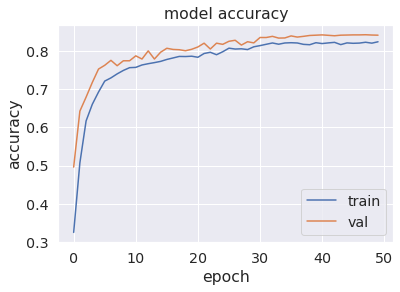

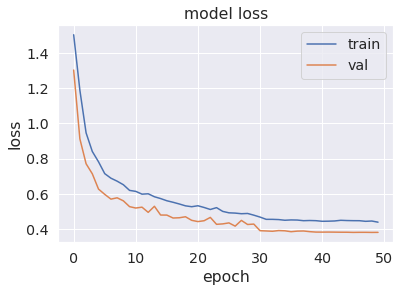

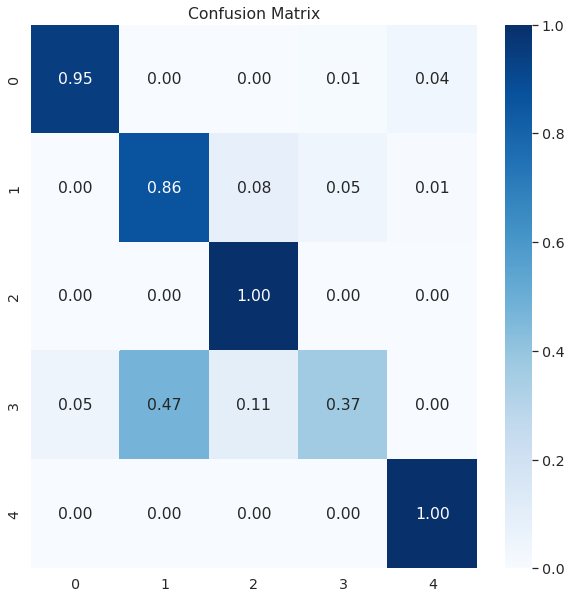

In [66]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

plot_acc(history2)
plot_loss(history2)
cm_plot(model2, x_test)

## Conv1d + LSTM

In [35]:
layer_in = layers.Input(shape=(140,1))
layer = layers.Conv1D(filters=32, kernel_size=8, activation='leaky_relu')(layer_in)
layer = layers.MaxPool1D(pool_size=4)(layer)
layer = layers.Bidirectional(layers.LSTM(16, return_sequences=False,))(layer)
layer = layers.Dropout(0.2)(layer)
layer = layers.Dense(32, activation='leaky_relu')(layer)
layer = layers.Dropout(0.2)(layer)
layer_out = layers.Dense(5, activation='softmax')(layer)

model3 = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
             keras.callbacks.ModelCheckpoint('model.h5', 
                                             save_best_only=True, 
                                             monitor='val_loss'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                               factor=0.1, 
                                               patience=3,
                                               ),
             keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=8,
                                           verbose=1)
             ]

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])


In [36]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 140, 1)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 133, 32)           288       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 33, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056

In [37]:
history3 = model3.fit(x_train_o, y_train_o,
                    batch_size=128, epochs=50, verbose=2,
                    validation_data=(x_val, y_val),
                    shuffle=True, callbacks=callbacks)

Epoch 1/50
83/83 - 7s - loss: 1.5928 - accuracy: 0.2540 - val_loss: 1.5373 - val_accuracy: 0.3316 - lr: 0.0010 - 7s/epoch - 85ms/step
Epoch 2/50
83/83 - 1s - loss: 1.3709 - accuracy: 0.4225 - val_loss: 1.1013 - val_accuracy: 0.5866 - lr: 0.0010 - 1s/epoch - 18ms/step
Epoch 3/50
83/83 - 1s - loss: 1.0719 - accuracy: 0.5744 - val_loss: 0.9217 - val_accuracy: 0.6502 - lr: 0.0010 - 1s/epoch - 18ms/step
Epoch 4/50
83/83 - 1s - loss: 0.9331 - accuracy: 0.6404 - val_loss: 0.8085 - val_accuracy: 0.7004 - lr: 0.0010 - 1s/epoch - 18ms/step
Epoch 5/50
83/83 - 1s - loss: 0.8306 - accuracy: 0.6846 - val_loss: 0.7151 - val_accuracy: 0.7214 - lr: 0.0010 - 1s/epoch - 18ms/step
Epoch 6/50
83/83 - 1s - loss: 0.7760 - accuracy: 0.7023 - val_loss: 0.6689 - val_accuracy: 0.7431 - lr: 0.0010 - 1s/epoch - 18ms/step
Epoch 7/50
83/83 - 2s - loss: 0.7253 - accuracy: 0.7167 - val_loss: 0.6123 - val_accuracy: 0.7575 - lr: 0.0010 - 2s/epoch - 20ms/step
Epoch 8/50
83/83 - 1s - loss: 0.7013 - accuracy: 0.7281 - val_

16/16 [==============================] - 0s 11ms/step - loss: 0.3103 - accuracy: 0.9120
Test accuracy 0.9120000004768372
Test loss 0.3103255331516266


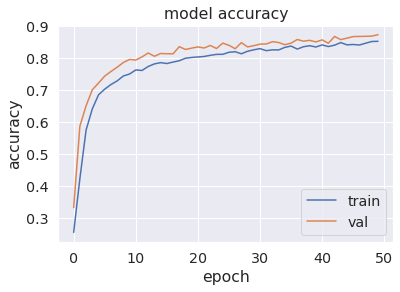

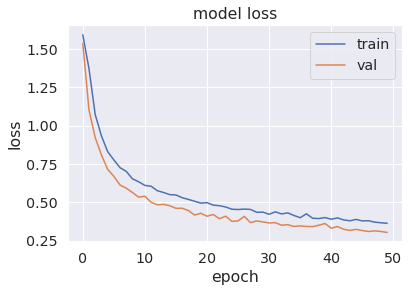

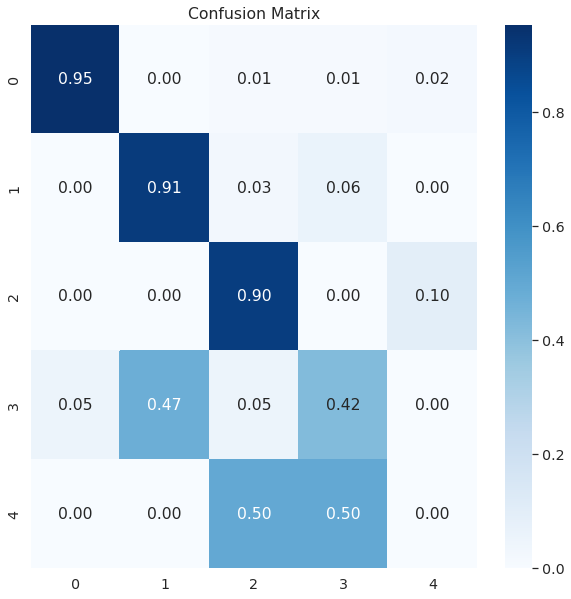

In [38]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

plot_acc(history3)
plot_loss(history3)
cm_plot(model3, x_test)